# 导入所需要的包

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import warnings
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.utils import to_categorical
import numpy as np
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

# 处理数据

digits

In [3]:
digits = datasets.load_digits()

In [4]:
print(digits.keys())

dict_keys(['data', 'target', 'DESCR', 'images', 'target_names'])


In [5]:
X = digits.data
#标记
Y = digits.target
 
#数据与处理，让特征值都处在0-1之间
X -= X.min()
X /= X.max()

In [6]:
Y = np.array(Y)
Y_ = to_categorical(Y)

In [7]:
X.shape

(1797, 64)

In [8]:
import math
index = []
lists = range(1797)
length = len(lists)
n = 5
for i in range(n):
    one_list = lists[math.floor(i / n * length):math.floor((i + 1) / n * length)]
    index.append(one_list)

# model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D
from keras.optimizers import RMSprop

DNN

In [10]:
acc = []
for i in range(5):
    X_test = X[index[i]]
    y_test = Y_[index[i]]
    y_test_class = Y[index[i]]
    i1 = (i+1)%5
    i2 = (i+2)%5
    i3 = (i+3)%5
    i4 = (i+4)%5
    X_train = X[np.append(np.append(np.append(index[i1],index[i2]),index[i3]),index[i4])]
    y_trian = Y_[np.append(np.append(np.append(index[i1],index[i2]),index[i3]),index[i4])]
    # 构建模型
    DNN = Sequential()
    DNN.add(Dense(512, activation='relu', input_shape=(64,)))
    DNN.add(Dropout(0.2))
    DNN.add(Dense(10, activation='softmax'))
    print(DNN.summary())
    DNN.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
    history = DNN.fit(X_train,y_trian,batch_size=100,epochs=20)
    y_pred_dnn_class = DNN.predict_classes(X_test)
    y_pred_dnn = DNN.predict(X_test)
    acc.append(accuracy_score(y_pred_dnn_class,y_test_class))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 38,410
Trainable params: 38,410
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1438/1438 [==============================] - 0s 273us/step - loss: 1.7178 - acc: 0.6892
Epoch 2/20
1438/1438 [==============================] - 0s 54us

1437/1437 [==============================] - 0s 57us/step - loss: 0.1491 - acc: 0.9694
Epoch 12/20
1437/1437 [==============================] - 0s 54us/step - loss: 0.1377 - acc: 0.9708
Epoch 13/20
1437/1437 [==============================] - 0s 55us/step - loss: 0.1190 - acc: 0.9763
Epoch 14/20
1437/1437 [==============================] - 0s 57us/step - loss: 0.1141 - acc: 0.9749
Epoch 15/20
1437/1437 [==============================] - 0s 51us/step - loss: 0.1070 - acc: 0.9784
Epoch 16/20
1437/1437 [==============================] - 0s 58us/step - loss: 0.0971 - acc: 0.9812
Epoch 17/20
1437/1437 [==============================] - 0s 59us/step - loss: 0.0983 - acc: 0.9736
Epoch 18/20
1437/1437 [==============================] - 0s 55us/step - loss: 0.0878 - acc: 0.9805
Epoch 19/20
1437/1437 [==============================] - 0s 55us/step - loss: 0.0842 - acc: 0.9826
Epoch 20/20
1437/1437 [==============================] - 0s 68us/step - loss: 0.0743 - acc: 0.9861
______________________

In [11]:
sum = 0 
for i in range(len(acc)):
    print('sample'+str(i)+':'+str(acc[i]))
    sum += acc[i]
print('average:'+str(sum/len(acc)))

sample0:0.9498607242339833
sample1:0.9080779944289693
sample2:0.9388888888888889
sample3:0.9721448467966574
sample4:0.9
average:0.9337944908696997


In [12]:
y_pred_dnn_ = DNN.predict(X_test) 
y_pred_dnn = DNN.predict_classes(X_test)

In [13]:
y_true = []
for i in y_test:
    y_true.append(i.argmax())

CNN

In [14]:
X = digits.data
#标记
Y = digits.target
 
#数据与处理，让特征值都处在0-1之间
X -= X.min()
X /= X.max()

In [15]:
X = X.reshape(X.shape[0],8,8,1)
Y = np.array(Y)
Y_ = to_categorical(Y)
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, Y_, test_size=0.2, random_state=1)

In [16]:



acc = []
for i in range(5):
    X_test = X[index[i]]
    y_test = Y_[index[i]]
    y_test_class = Y[index[i]]
    i1 = (i+1)%5
    i2 = (i+2)%5
    i3 = (i+3)%5
    i4 = (i+4)%5
    X_train = X[np.append(np.append(np.append(index[i1],index[i2]),index[i3]),index[i4])]
    y_trian = Y_[np.append(np.append(np.append(index[i1],index[i2]),index[i3]),index[i4])]
    # 构建模型
    CNN = Sequential()
    CNN.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(8,8,1))) # 32个过滤器，过滤器大小是3×3，32×26×26
    CNN.add(Conv2D(64, (3, 3), activation='relu')) #64×24×24
    CNN.add(MaxPooling2D(pool_size=(2, 2)))# 向下取样
    CNN.add(Dropout(0.25))
    CNN.add(Flatten()) #降维：将64×12×12降为1维（即把他们相乘起来）
    CNN.add(Dense(128, activation='relu'))
    CNN.add(Dropout(0.5))
    CNN.add(Dense(10, activation='softmax')) #全连接2层
    CNN.summary()
    CNN.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
    history = CNN.fit(X_train,y_trian,batch_size=100,epochs=20)
    y_pred_cnn_class = CNN.predict_classes(X_test)
    y_pred_cnn = CNN.predict(X_test)
    acc.append(accuracy_score(y_pred_cnn_class,y_test_class))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 32)          320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

1437/1437 [==============================] - 1s 859us/step - loss: 2.1350 - acc: 0.2797
Epoch 2/20
1437/1437 [==============================] - 0s 199us/step - loss: 1.5397 - acc: 0.5581
Epoch 3/20
1437/1437 [==============================] - 0s 162us/step - loss: 1.0658 - acc: 0.6667
Epoch 4/20
1437/1437 [==============================] - 0s 193us/step - loss: 0.8076 - acc: 0.7634
Epoch 5/20
1437/1437 [==============================] - 0s 173us/step - loss: 0.6299 - acc: 0.8065
Epoch 6/20
1437/1437 [==============================] - 0s 163us/step - loss: 0.5271 - acc: 0.8406
Epoch 7/20
1437/1437 [==============================] - 0s 168us/step - loss: 0.4481 - acc: 0.8629
Epoch 8/20
1437/1437 [==============================] - 0s 186us/step - loss: 0.3908 - acc: 0.8817
Epoch 9/20
1437/1437 [==============================] - 0s 174us/step - loss: 0.3180 - acc: 0.9151
Epoch 10/20
1437/1437 [==============================] - 0s 172us/step - loss: 0.2934 - acc: 0.9200
Epoch 11/20
1437/143

1437/1437 [==============================] - 0s 179us/step - loss: 0.1724 - acc: 0.9478
Epoch 16/20
1437/1437 [==============================] - 0s 162us/step - loss: 0.1457 - acc: 0.9576
Epoch 17/20
1437/1437 [==============================] - 0s 159us/step - loss: 0.1444 - acc: 0.9534
Epoch 18/20
1437/1437 [==============================] - 0s 162us/step - loss: 0.1359 - acc: 0.9562
Epoch 19/20
1437/1437 [==============================] - 0s 161us/step - loss: 0.1229 - acc: 0.9687
Epoch 20/20
1437/1437 [==============================] - 0s 175us/step - loss: 0.1214 - acc: 0.9610


In [17]:
sum = 0 
for i in range(len(acc)):
    print('sample'+str(i)+':'+str(acc[i]))
    sum += acc[i]
print('average:'+str(sum/len(acc)))

sample0:0.9749303621169917
sample1:0.9526462395543176
sample2:0.9722222222222222
sample3:0.9860724233983287
sample4:0.9277777777777778
average:0.9627298050139277


In [18]:
y_pred_cnn_ = CNN.predict(X_test)
y_pred_cnn = CNN.predict_classes(X_test)
y_pred_cnn

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 9, 0, 0, 2, 2, 7, 5, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 3, 2, 0, 0, 9, 7, 6, 3, 2, 3, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 9, 4, 0, 5, 3, 6, 9, 6, 3, 7, 5,
       4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1,
       2, 3, 4, 5, 1, 8, 5, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 5, 9, 4, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1,
       6, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 1, 3, 7, 3, 3, 4, 6, 6, 6, 8, 9,
       1, 5, 0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 8, 6, 3, 1, 3, 9, 1,
       7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5,
       7, 3, 5, 8, 4, 5, 0, 8, 9, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 5, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5,
       6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0,
       1, 2, 6, 3, 2, 7, 5, 3, 4, 6, 6, 6, 4, 9, 1,

In [19]:
y_true = []
for i in y_test:
    y_true.append(i.argmax())
y_true = np.array(y_true)

In [20]:
print(y_true.shape)
print(y_pred_cnn.shape)
print(y_pred_dnn.shape)

(360,)
(360,)
(360,)


混淆矩阵

In [21]:
matrix_dnn = np.random.rand(10,10)
for i in range(10):
    for j in range(10):
        matrix_dnn[i][j] = 0
matrix_dnn

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
y_pred_dnn

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 9, 7,
       7, 3, 5, 9, 0, 0, 2, 2, 7, 8, 2, 0, 9, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 9, 5, 0, 9, 5, 2, 9, 2, 0, 0, 9, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 9, 4, 0, 5, 3, 6, 9, 6, 9, 7, 5,
       4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1,
       2, 3, 4, 5, 1, 8, 1, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 5, 7, 4, 9, 5, 5, 6, 5, 0, 9, 4, 5, 8, 4, 1, 7, 7, 3, 5, 1,
       6, 0, 2, 2, 4, 8, 2, 0, 1, 2, 6, 8, 7, 7, 7, 8, 4, 6, 6, 6, 8, 9,
       1, 5, 0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 8, 6, 3, 1, 3, 9, 1,
       7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5,
       7, 8, 5, 8, 4, 5, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 8, 4, 5, 6, 7, 8, 9, 0, 1, 2, 5, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5,
       6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 7, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0,
       1, 2, 6, 8, 2, 7, 5, 8, 4, 6, 6, 6, 4, 9, 1,

In [24]:
for i in range(len(y_true)):
    matrix_dnn[y_true[i]][y_pred_dnn[i]]+=1

In [25]:
matrix_dnn

array([[33.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.],
       [ 0.,  0., 35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 25.,  0.,  3.,  0.,  3.,  5.,  0.],
       [ 0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 37.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0., 36.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0., 34.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  2.,  0.,  0., 28.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1., 33.]])

In [26]:
matrix_cnn = np.random.rand(10,10)
for i in range(10):
    for j in range(10):
        matrix_cnn[i][j] = 0
matrix_cnn

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
for i in range(len(y_true)):
    matrix_cnn[y_true[i]][y_pred_cnn[i]]+=1

In [28]:
matrix_cnn

array([[33.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 0., 31.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  3.],
       [ 0.,  0., 35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1., 32.,  0.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 37.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0., 36.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 35.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  4.,  0.,  1., 26.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0., 35.]])

ROC曲线

In [29]:
y_pred_dnn_ = y_pred_dnn_
y_pred_dnn_.shape

(360, 10)

In [30]:
y_test = y_test
y_test.shape

(360, 10)

In [31]:
y_pred_cnn_ = y_pred_cnn_
y_pred_cnn_.shape

(360, 10)

In [32]:
y_test.shape

(360, 10)

In [33]:
y_test = y_test.astype(int)

In [35]:
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

No handles with labels found to put in legend.


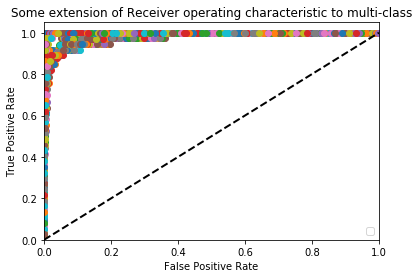

In [36]:
plt.figure()
for k in range(10):
    true = 0
    false = 0
    for i in y_test[:,k]:
        if i==0:
            false+=1
        else:
            true+=1
 
    # 以序号为i为阈值
    for i in range(len(y_pred_dnn_[:,k])):
        tp = 0
        fp = 0

        # 判断序号为j为正例或负例
        for j in range(len(y_pred_dnn_[:,k])):
            # 正阳例
            if y_pred_dnn_[:,k][j]>=y_pred_dnn_[:,k][i] and y_test[:,k][j]==1:
                tp += 1
            # 负阳例
            elif y_pred_dnn_[:,k][j]>=y_pred_dnn_[:,k][i] and y_test[:,k][j]==0:
                fp += 1
        plt.scatter(x=fp/false,y=tp/true)
lw = 2
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
plt.show()

No handles with labels found to put in legend.


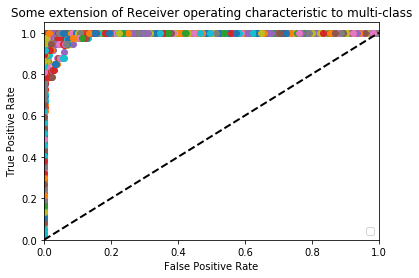

In [37]:
plt.figure()
for k in range(10):
    true = 0
    false = 0
    for i in y_test[:,k]:
        if i==0:
            false+=1
        else:
            true+=1
 
    # 以序号为i为阈值
    for i in range(len(y_pred_cnn_[:,k])):
        tp = 0
        fp = 0

        # 判断序号为j为正例或负例
        for j in range(len(y_pred_cnn_[:,k])):
            # 正阳例
            if y_pred_cnn_[:,k][j]>=y_pred_cnn_[:,k][i] and y_test[:,k][j]==1:
                tp += 1
            # 负阳例
            elif y_pred_cnn_[:,k][j]>=y_pred_cnn_[:,k][i] and y_test[:,k][j]==0:
                fp += 1
        plt.scatter(x=fp/false,y=tp/true)
lw = 2
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
plt.show()